# ANLY-590 HW2

Group Members: Zhe Zhou, Jiaxuan Sun, Jen Wang

## Problem1 : Feedforward: Building a ReLU neural network

### Problem 1.1 
Draw a network with:
* 2 inputs
* 1 hidden layers with 3 hidden units
* 1-class output (for binary classiﬁcation)

<br>

![Draw a Network](problem1.png)

### Problem 1.2 
Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).


#### Assume $h(x)$ is the ReLU activation function, $f(x)$ is the sigmoid activation function.
$$h_1 = h(x_1*w_{11}+x_2*w_{21}+b_{11})$$
$$h_2 = h(x_1*w_{12}+x_2*w_{22}+b_{12})$$
$$h_3 = h(x_1*w_{13}+x_2*w_{23}+b_{13})$$

$$\begin{aligned}
 y_1 &= f(h_1*v_1+h_2*v_2+h_3*v3+b2) \\
 &= f(h(x_1*w_{11}+x_2*w_{21}+b_{11})*v_1+ \\
 &\space\space\space\space\space\space\space\space\space h(x_1*w_{12}+x_2*w_{22}+b_{12})*v_2+\\
 &\space\space\space\space\space\space\space\space\space h(x_1*w_{13}+x_2*w_{23}+b_{13})*v3+b2)
\end{aligned}$$


<br>

### Problem 1.3

Write out the forward-pass function in python, call it ff_nn_ReLu(...)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
def sigmoid(x):    
    return 1 / (1 + np.exp(-x))

def ReLu(x):    
    return np.maximum(x,0)

def ff_nn_Relu(W1, b1, V, c, x):
    a1 = np.dot(x, W1) + b1        
    z1 = ReLu(a1)        
    a2 = np.dot(z1, V) + c       
    y = sigmoid(a2)
    return y

<br>

###  Problem 1.4
Given the following input and weight matrices, calculate the output.

$W^{(1)} = \begin{bmatrix}1&-1&0\\0&0&0.5\end{bmatrix}\;\;\;\;b^{(1)} = \begin{bmatrix}0&0&1\end{bmatrix}^T$

$V = \begin{bmatrix}1\\0\\1\end{bmatrix}\;\;\;\;c = [1] \;\;\;\; X = \begin{bmatrix}1&-1\\0&-1\\0&1\end{bmatrix}$



In [3]:
W1 = np.array([[1,-1,0],[0,0,0.5]])
b1 = np.array([0,0,1])
V = np.array([[1],[0],[-1]])
c = 1 
x = np.array([[1,-1],[0,-1],[0,1]])
output = ff_nn_Relu(W1, b1, V, c, x)
print('The class probabilities associated with the forward pass of each sample: ')
print(output)

The class probabilities associated with the forward pass of each sample: 
[[0.81757448]
 [0.62245933]
 [0.37754067]]


<br>

## Problem2 : Gradient Descent

### Problem 2.1
What are the partial derivatives of f with respect to x and to y?

$\frac{\partial f}{\partial x} = -3x^2-200(y^2-x)$ <br/>
$\frac{\partial f}{\partial y} = 400y^3-400xy$

<br>

### Problem 2.2
Create a visualization of the contours of the Rosenbrock function.

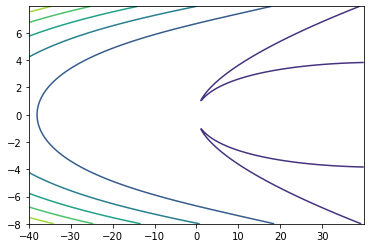

In [4]:
x=np.arange(-40, 40, 0.05)
y=np.arange(-8, 8, 0.05)
X,Y=np.meshgrid(x,y)

Z = (1-X**3) + 100*(Y**2-X)**2
fig, ax = plt.subplots()
ct = ax.contour(X, Y, Z)
#plt.ylim((-9,9))

<br>

### Problem 2.3

Write a Gradient Descent algorithm for ﬁnding the minimum of the function. Visualize your results with a few diﬀerent learning rates.

In [5]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2-200*(y**2-x) 
    df_dy = 400*y**3-400*x*y
    return np.array([df_dx, df_dy])

def grad_descent(starting_point, iterations, learning_rate):
    point = starting_point
    trajectory = [point]
        
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    print('Final point: ',point)
    return np.array(trajectory)

Final point:  [7.16017539e-08 2.83078999e-04]


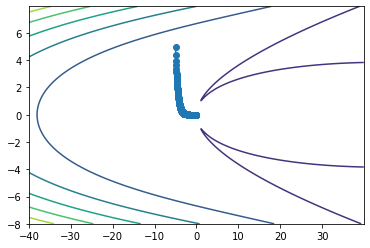

In [6]:
##############################
### learning rate: 0.00001
##############################
stpoint = np.array([-5,5])
trj = grad_descent(stpoint,iterations=10000,learning_rate = 0.00001)
fig, ax = plt.subplots()
ct = ax.contour(X, Y, Z)
x= trj[:,0]
y= trj[:,1]
plt.plot(x,y,'-o')

Final point:  [3.06863673e-08 1.75175247e-04]


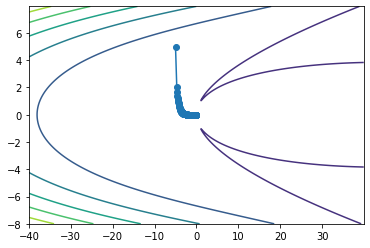

In [7]:
##############################
### learning rate: 0.00005
##############################
stpoint = np.array([-5,5])
trj = grad_descent(stpoint,iterations=10000,learning_rate = 0.00005)
fig, ax = plt.subplots()
ct = ax.contour(X, Y, Z)
x= trj[:,0]
y= trj[:,1]
plt.plot(x,y,'-o')

Final point:  [ 1.74152490e-08 -1.31966848e-04]


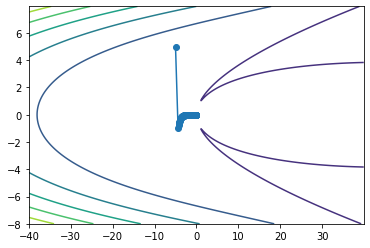

In [8]:
##############################
### learning rate: 0.0001
##############################
stpoint = np.array([-5,5])
trj = grad_descent(stpoint,iterations=10000,learning_rate = 0.0001)
fig, ax = plt.subplots()
ct = ax.contour(X, Y, Z)
x= trj[:,0]
y= trj[:,1]
plt.plot(x,y,'-o')

We tried three learning rates as shown above. Within certain range, larger learning rate yeilds faster convergence.

<br>

### Problem 2.4
Write a Gradient Descent With Momentum algorithm for ﬁnding the minimum. Visualize your results with a few diﬀerent settings of the algorithm’s hyperparameters.

In [9]:
def grad_descent_with_momentum(starting_point, iterations, alpha, epsilon):
    point = starting_point   
    trajectory = [point]
    v = np.zeros(point.size)
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    print('Final point: ',point)
    return np.array(trajectory)

Final point:  [7.17343088e-08 2.83013314e-04]


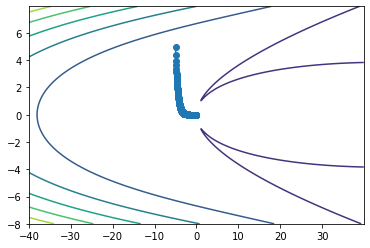

In [10]:
##################################
### epsilon: 0.00001, alpha=0.001
##################################

stpoint = np.array([-5,5])
trj = grad_descent_with_momentum(stpoint,iterations=10000, epsilon=0.00001, alpha=0.001)

fig, ax = plt.subplots()
ct = ax.contour(X, Y, Z)
x= trj[:,0]
y= trj[:,1]
plt.plot(x,y,'-o')

Final point:  [3.05691859e-08 1.74840458e-04]


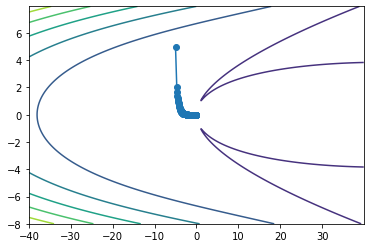

In [11]:
##################################
### epsilon: 0.00005, alpha=0.001
##################################

stpoint = np.array([-5,5])
trj = grad_descent_with_momentum(stpoint,iterations=10000, epsilon=0.00005, alpha=0.001)

fig, ax = plt.subplots()
ct = ax.contour(X, Y, Z)
x= trj[:,0]
y= trj[:,1]
plt.plot(x,y,'-o')

Final point:  [ 1.76688946e-08 -1.32924394e-04]


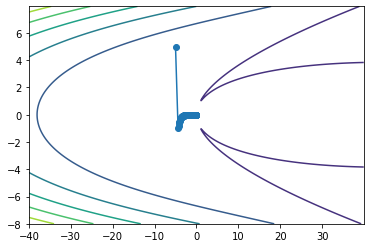

In [12]:
##################################
### epsilon: 0.0001, alpha=0.001
##################################

stpoint = np.array([-5,5])
traj = grad_descent_with_momentum(stpoint,iterations=10000, epsilon=0.0001, alpha=0.001)

fig, ax = plt.subplots()
ct = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

We tried three different sets of hyperparameters. The value of epsilon has more apparent effect than alpha. Larger epsilon yeilds faster convergence. 

<br>

## Problem 3 Backprop

###  Problem 3.1 
For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

#### This model has 13 free parameters with ReLu activations in the hidden layer and a sigmoid output for the classifier. Loss function will be binary cross-entropy.

Loss function:

$$L = -y_i log(\hat{y_i}) - (1-y_i)log(1-\hat{y_i})$$

Define the ReLu function as h(x) where x >0 then h(x) = x else h(x) = 0. The sigmoid function as f(x) where $f(x) =  \frac{1}{1+e^x}$

$$a_1 = x_1*w_{11}+x_2*w_{21}+b_{11}$$
$$a_2 = x_1*w_{12}+x_2*w_{22}+b_{12}$$
$$a_3 = x_1*w_{13}+x_2*w_{23}+b_{13}$$

$$h_1 = h(a_1) = h(x_1*w_{11}+x_2*w_{21}+b_{11})$$
$$h_2 = h(a_2) = h(x_1*w_{12}+x_2*w_{22}+b_{12})$$
$$h_3 = h(a_3) = h(x_1*w_{13}+x_2*w_{23}+b_{13})$$

$$z = h1*v1+h2*v2+b_2$$

$$\begin{aligned}
 y &= f(z) \\
 &= f(h(x_1*w_{11}+x_2*w_{21}+b_{11})*v_1+ \\
 &\space\space\space\space\space\space\space\space\space h(x_1*w_{12}+x_2*w_{22}+b_{12})*v_2+\\
 &\space\space\space\space\space\space\space\space\space h(x_1*w_{13}+x_2*w_{23}+b_{13})*v3+b_2)
\end{aligned}$$

Now we derive expressions of the gradient of the loss function for each parameter

$$\frac{\partial L}{\partial \hat{y}}= \frac{\partial}{\partial \hat{y}} \cdot (-y_j log(\hat{y_j}) - (1-y_i)log(1-\hat{y_j})) =  -(\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}})$$<br>

$$\frac{\partial y}{\partial z}= \frac{\partial}{\partial z} \cdot f(z) =  f(z) \cdot (1-f(z))$$<br>

$$\frac{\partial z}{\partial v_i}= \frac{\partial}{\partial v_i} \cdot (\sum {v_i*h_i}+b_2) =  h_i $$<br>

$$\frac{\partial h_i}{\partial a_i}= \frac{\partial}{\partial a_i} \cdot h(a_i) = 1 \space or \space 0 $$<br>

$$\frac{\partial a_j}{\partial w_{ij}}= \frac{\partial}{\partial w_{ij}} \cdot (\sum {w_{ij}*x_i}+b_{1j}) = x_i$$<br>

$$\frac{\partial L}{\partial v_1}= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial \hat{z}}{\partial v_1} $$<br>
$$\frac{\partial L}{\partial v_2}= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial \hat{z}}{\partial v_2} $$<br>
$$\frac{\partial L}{\partial v_3}= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial \hat{z}}{\partial v_3} $$<br>
$$\frac{\partial L}{\partial b_2}= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial \hat{z}}{\partial b2}$$<br>

$$\frac{\partial L}{\partial w_{11}}= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial h1} \cdot \frac{\partial h_1}{\partial a_1} \cdot \frac{\partial a_1}{\partial w_{11}} $$<br>
$$\frac{\partial L}{\partial w_{12}}= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial h_2} \cdot \frac{\partial h_2}{\partial a_2} \cdot \frac{\partial a_2}{\partial w_{12}} $$<br>
$$\frac{\partial L}{\partial w_{13}}= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial h_3} \cdot \frac{\partial h_3}{\partial a_3} \cdot \frac{\partial a_3}{\partial w_{13}} $$<br>


$$\frac{\partial L}{\partial w_{21}}= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial h1} \cdot \frac{\partial h_1}{\partial a_1} \cdot \frac{\partial a_1}{\partial w_{21}} $$<br>
$$\frac{\partial L}{\partial w_{22}}= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial h_2} \cdot \frac{\partial h_2}{\partial a_2} \cdot \frac{\partial a_2}{\partial w_{22}} $$<br>
$$\frac{\partial L}{\partial w_{23}}= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial h_3} \cdot \frac{\partial h_3}{\partial a_3} \cdot \frac{\partial a_3}{\partial w_{23}} $$<br>


$$\frac{\partial L}{\partial b_{11}}= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial h_1} \cdot \frac{\partial h_1}{\partial a_1} \cdot \frac{\partial a_1}{\partial b_{11}} $$<br>
$$\frac{\partial L}{\partial b_{12}}= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial h_2} \cdot \frac{\partial h_2}{\partial a_2} \cdot \frac{\partial a_2}{\partial b_{12}} $$<br>
$$\frac{\partial L}{\partial b_{13}}= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial h_3} \cdot \frac{\partial h_3}{\partial a_3} \cdot \frac{\partial a_3}{\partial b_{13}} $$<br>


### Problem 3.2 
Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [13]:
def loss(y, y_hat):
    # binary cross entropy
    return np.average((-y * np.log(y_hat) - (1-y)*np.log(1-y_hat)))

def loss_derivative(y, y_hat):
    # binary cross entropy
    return  -(y/y_hat - (1-y)/(1-y_hat))

def relu(x):
    return np.maximum(x,0)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu_derivative(x):
    return np.where(x>0,1,0)

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def yhat(x,coeffs):
    # returns model prediction 
    
    w11,w12,w13,w21,w22,w23,v1,v2,v3,b11,b12,b13,c = coeffs
    
    w = np.array([[w11,w12,w13],[w21,w22,w23]])
    b = np.array([b11,b12,b13])
    v = np.array([[v1],[v2],[v3]])
    
    a = np.dot(x, w) + b
    h = relu(a)
    z = np.dot(h, v) + c
    y_hat = sigmoid(z)
    
    return y_hat

In [14]:
def grad_f(coeffs, x,y):
    w11,w12,w13,w21,w22,w23,v1,v2,v3,b11,b12,b13,c = coeffs
    
    w = np.array([[w11,w12,w13],[w21,w22,w23]])
    b = np.array([b11,b12,b13])
    v = np.array([[v1],[v2],[v3]])
    
    a = np.dot(x, w) + b
    a1 = a[:,0].reshape((a.shape[0],1))
    a2 = a[:,1].reshape((a.shape[0],1))
    a3 = a[:,2].reshape((a.shape[0],1))

    h = relu(a)
    h1 = h[:,0].reshape((h.shape[0],1))
    h2 = h[:,1].reshape((h.shape[0],1))
    h3 = h[:,2].reshape((h.shape[0],1))
    
    z = np.dot(h, v) + c
    y_hat = sigmoid(z)

    x1 = x[:,0].reshape((x.shape[0],1))
    x2 = x[:,1].reshape((x.shape[0],1))
    
    dL_dv1 = np.average(loss_derivative(y, y_hat)*sigmoid_derivative(z)*h1)
    dL_dv2 = np.average(loss_derivative(y, y_hat)*sigmoid_derivative(z)*h2)
    dL_dv3 = np.average(loss_derivative(y, y_hat)*sigmoid_derivative(z)*h3)
    dL_dc = np.average(loss_derivative(y, y_hat)*sigmoid_derivative(z)*1)
    
    dL_dw11 = np.average(loss_derivative(y, y_hat)* sigmoid_derivative(z)*v1*relu_derivative(a1)*x1)
    dL_dw12 = np.average(loss_derivative(y, y_hat)* sigmoid_derivative(z)*v2*relu_derivative(a2)*x1)
    dL_dw13 = np.average(loss_derivative(y, y_hat)* sigmoid_derivative(z)*v3*relu_derivative(a3)*x1)
    
    dL_dw21 = np.average(loss_derivative(y, y_hat)* sigmoid_derivative(z)*v1*relu_derivative(a1)*x2)
    dL_dw22 = np.average(loss_derivative(y, y_hat)* sigmoid_derivative(z)*v2*relu_derivative(a2)*x2)
    dL_dw23 = np.average(loss_derivative(y, y_hat)* sigmoid_derivative(z)*v3*relu_derivative(a3)*x2)
    
    dL_db11 = np.average(loss_derivative(y, y_hat)* sigmoid_derivative(z)*v1*relu_derivative(a1)*1)
    dL_db12 = np.average(loss_derivative(y, y_hat)* sigmoid_derivative(z)*v2*relu_derivative(a2)*1)
    dL_db13 = np.average(loss_derivative(y, y_hat)* sigmoid_derivative(z)*v3*relu_derivative(a3)*1)
    

    return np.array([dL_dw11,dL_dw12,dL_dw13,dL_dw21,dL_dw22,dL_dw23,dL_dv1,dL_dv2,dL_dv3,dL_db11,dL_db12,dL_db13,dL_dc])

###  Problem3.3 
Generate a synthetic dataset like the XOR pattern.


In [15]:
import numpy as np
import numpy as np
from math import pi as Pi
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random

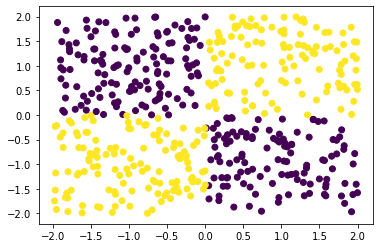

In [16]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)
y = y.reshape((500,1))

### Problem 3.4
Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [17]:
def grad_descent(x, y, starting_point=None, iterations=10, learning_rate=1e-2):
    np.random.seed(50)
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=13).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x,point))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x,point)))
    return (np.array(trajectory), losses)

In [18]:
traj, losses = grad_descent(x, y, iterations=1500,learning_rate=0.3)

Text(0.5, 0, 'Iteration')

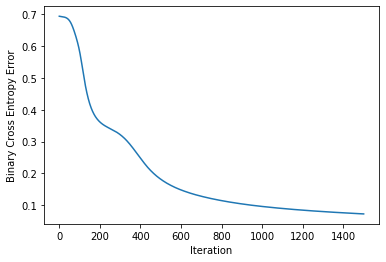

In [19]:
plt.plot(losses)
plt.ylabel("Binary Cross Entropy Error")
plt.xlabel("Iteration")

### Problem 3.5 
Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [20]:
def grad_descent_with_momentum(x,y,starting_point=None, iterations=10, alpha=.9, epsilon=1e-1):
    np.random.seed(50)
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=13).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x,point))]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point,x,y)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, yhat(x,point)))
    return (np.array(trajectory), losses)

In [21]:
traj_momentum, losses_momentum = grad_descent_with_momentum(x, y, iterations=1500,alpha=.9)

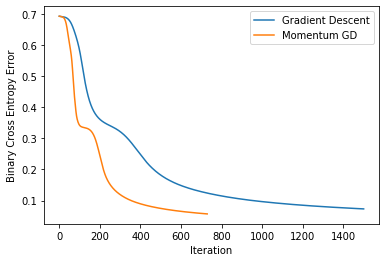

In [22]:
plt.plot(losses, label = "Gradient Descent")
plt.plot(losses_momentum, label = "Momentum GD")
plt.xlabel("Iteration")
plt.ylabel("Binary Cross Entropy Error")
plt.legend(loc = "upper right")

#### From above plot we can see that loss function converge more efficiently with momentum.

<br>

### Problem 3.6 
Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

In [23]:
def plot_decision_boundary(x,y,params):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    _in=np.array([xx.ravel(), yy.ravel()]).T
    z=yhat(_in,params)
    z=z>0.5
    z=z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.2)
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y))

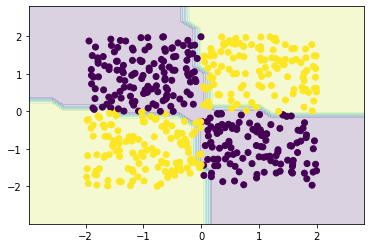

In [24]:
plot_decision_boundary(x, y, traj_momentum[500])

#### From above graph we can find that the decision boundry learned by our model is correct and accurate.